In [1]:
import numpy as np
from test import test
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize
from stats import *

In [2]:
topics = [np.array([[-1, 1]]), np.array([[-5, 5]]), np.array([[-10, 10]]), np.array([[-20, 20]]), np.array([[-50, 50]])]
varied_param_values = [2, 10, 20, 40, 100]

In [3]:
varied_param = 'topics'
varied_param_legend_label = 'Topic Space Width'
varied_param_x_label = 'Topic Space Width'

In [4]:
num_influencers = 1
num_agents = 25

In [5]:
perfect_info_stats, imperfect_info_stats = test(
    topics=topics,
    varied_param=varied_param,
    num_influencers=num_influencers,
    num_agents=num_agents,
    producer_topic_interest_func=None,
    consumer_topic_interest_func=None,
    agent_topic_interest_func=lambda x: inverse_decay(x, 1, 2),
    consumer_attention_bound=30,
    consumer_external_interest_prob=3,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=60,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    use_imperfect_information=False,
)

Optimizing consumer 0
Optimizing consumer 1
Optimizing consumer 2
Optimizing consumer 3
Optimizing consumer 4
Optimizing consumer 5
Optimizing consumer 6
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing consumer 12
Optimizing consumer 13
Optimizing consumer 14
Optimizing consumer 15
Optimizing consumer 16
Optimizing consumer 17
Optimizing consumer 18
Optimizing consumer 19
Optimizing consumer 20
Optimizing consumer 21
Optimizing consumer 22
Optimizing consumer 23
Optimizing consumer 24
Optimizing influencer 25
Optimizing producer 0
Optimization succeeded (overall 0.010171334026381373s): nit=4, nfev=12, njev=6.
Optimizing producer 1
Optimization succeeded (overall 0.00954679201822728s): nit=4, nfev=12, njev=6.
Optimizing producer 2
Optimization succeeded (overall 0.0090968330623582s): nit=4, nfev=12, njev=6.
Optimizing producer 3
Optimization succeeded (overall 0.009044333011843264s): nit=4, nfev=12, njev=6.
Optim

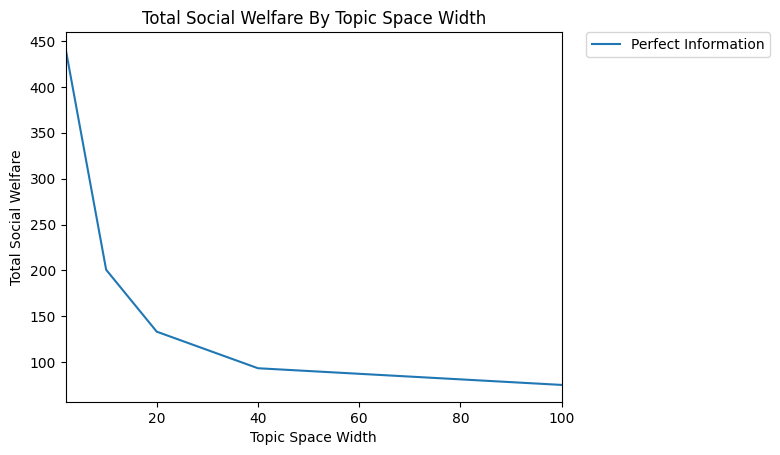

In [6]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'total_social_welfare', varied_param_values, varied_param_x_label, 'Total Social Welfare')

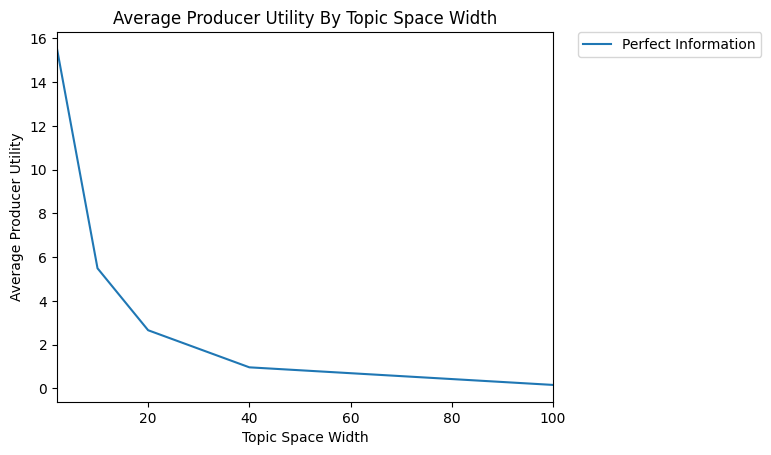

In [7]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_producer_utility', varied_param_values, varied_param_x_label, 'Average Producer Utility')

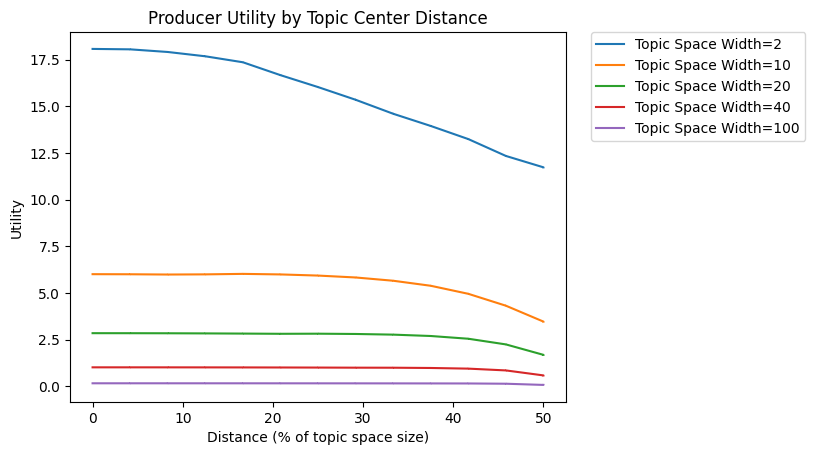

In [25]:
plt.figure()
plt.title('Producer Utility by Topic Center Distance')

for val, stats in zip(varied_param_values, perfect_info_stats):
    topics_bounds = stats.producer_stats[0].market.topics_bounds
    topic_center = np.mean(topics_bounds, axis=1)
    topic_space_size = 0
    for i in range(len(topics_bounds)):
        topic_space_size += topics_bounds[i][1] - topics_bounds[i][0]
    distances = []
    utilities = []
    for producer_stat in sorted(stats.producer_stats.values(), key=lambda x: np.linalg.norm(x.agent.main_interest - topic_center) / topic_space_size):
        producer = producer_stat.agent
        main_interest = producer.main_interest
        distance = np.linalg.norm(main_interest - topic_center) / topic_space_size * 100
        distances.append(distance)
        utilities.append(stats.producer_stats[producer.index].utilities[-1])
    plt.plot(distances, utilities, label=f'{varied_param_legend_label}={val}')
plt.xlabel('Distance (% of topic space size)')
plt.ylabel('Utility')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

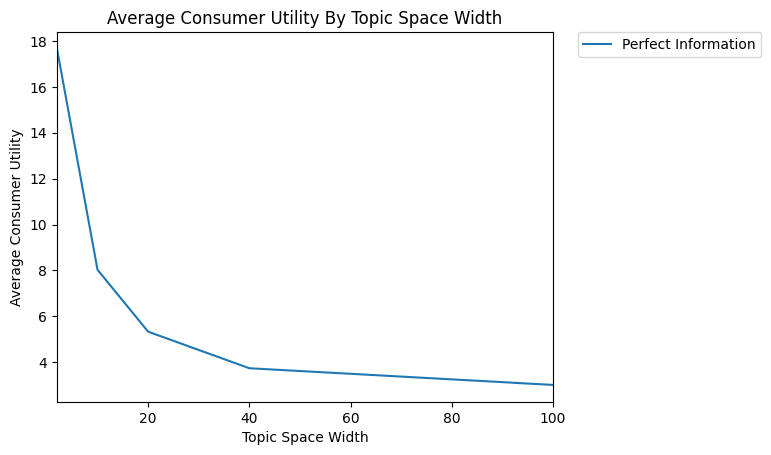

In [9]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_consumer_utility', varied_param_values, varied_param_x_label, 'Average Consumer Utility')

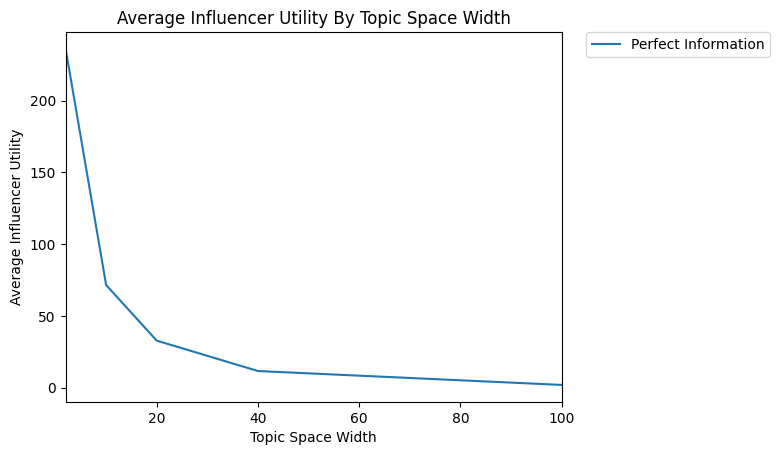

In [10]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_utility', varied_param_values, varied_param_x_label, 'Average Influencer Utility')

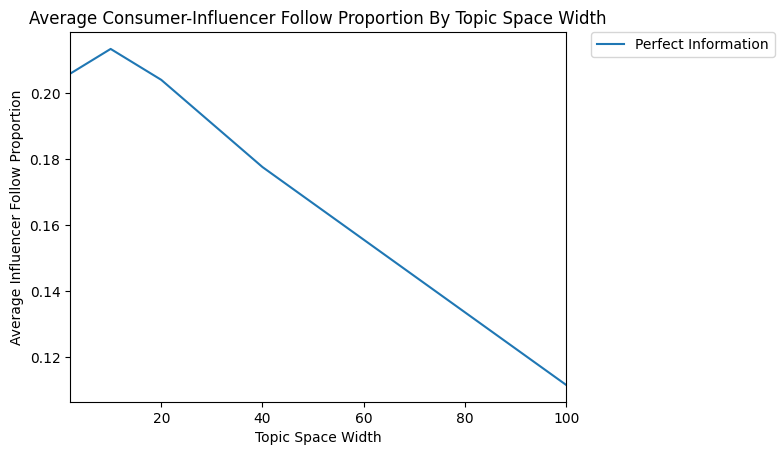

In [11]:
visualize.plot_ending_value_by_test(f"Average Consumer-Influencer Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_influencer_follow_proportion', varied_param_values, varied_param_x_label, 'Average Influencer Follow Proportion')

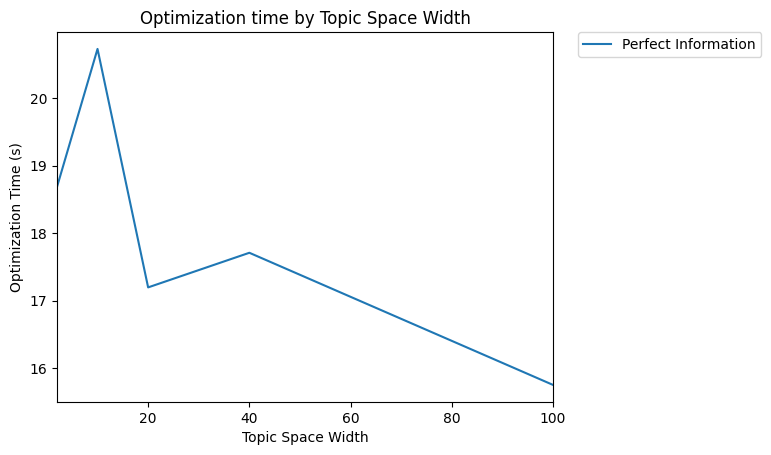

In [12]:
visualize.plot_value_by_test(f"Optimization time by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'optimization_time', varied_param_values, varied_param_x_label, 'Optimization Time (s)')

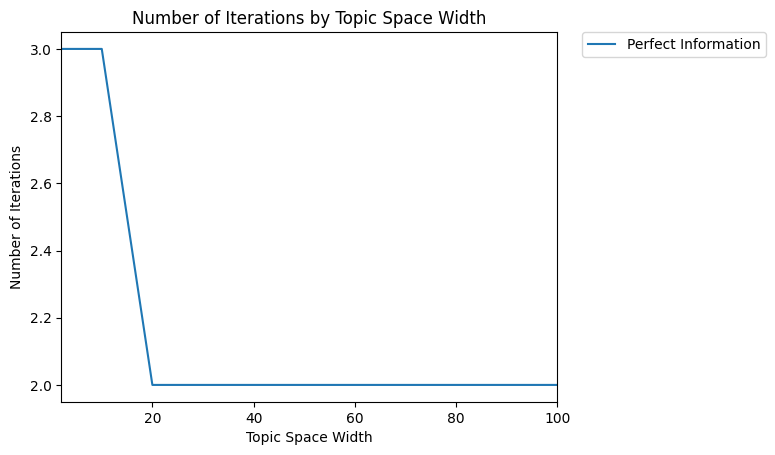

In [13]:
visualize.plot_value_by_test(f"Number of Iterations by {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'num_iterations', varied_param_values, varied_param_x_label, 'Number of Iterations')

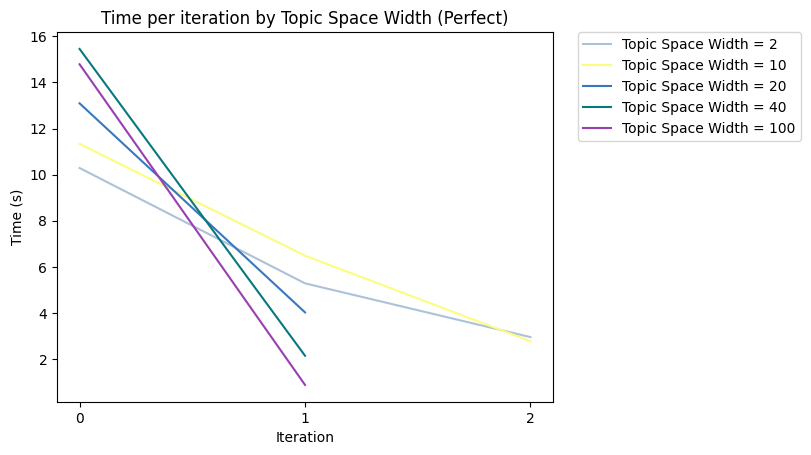

In [14]:
visualize.plot_value_by_iteration_by_test(f"Time per iteration by {varied_param_x_label} (Perfect)", perfect_info_stats, 'optimization_times', varied_param_legend_label, varied_param_values, 'Time (s)')

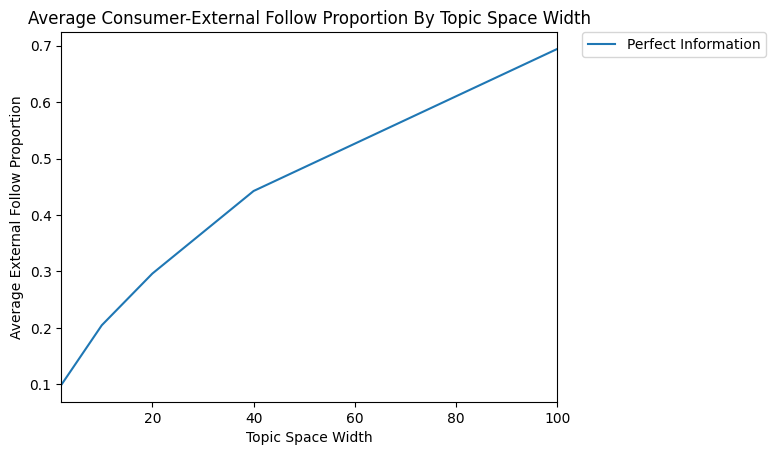

In [15]:
visualize.plot_ending_value_by_test(f"Average Consumer-External Follow Proportion By {varied_param_x_label}", perfect_info_stats, imperfect_info_stats, 'average_external_follow_proportion', varied_param_values, varied_param_x_label, 'Average External Follow Proportion')

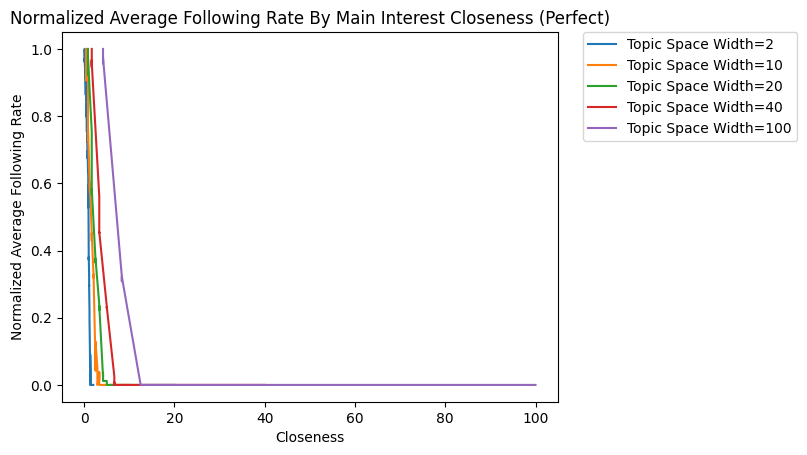

In [16]:
plt.figure()
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_rate_by_main_interest_closeness = perfect_stat.average_following_rate_by_main_interest_closeness
    if len(avg_rate_by_main_interest_closeness) == 0:
        continue
    closenesses = [x[0] for x in avg_rate_by_main_interest_closeness]
    rates = [x[1] for x in avg_rate_by_main_interest_closeness]
    min_rate = min(rates)
    max_rate = max(rates)
    rates = [(x - min_rate) / (max_rate - min_rate) for x in rates]
    plt.plot(closenesses, rates, label=f"{varied_param_legend_label}={varied_param_values[i]}")
plt.title(f"Normalized Average Following Rate By Main Interest Closeness (Perfect)")
plt.xlabel("Closeness")
plt.ylabel("Normalized Average Following Rate")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [28]:
# for i in range(num_agents):
    # visualize.plot_agent_following_rates_by_test(i, [stat.consumer_stats for stat in perfect_info_stats], varied_param_legend_label, varied_param_values)

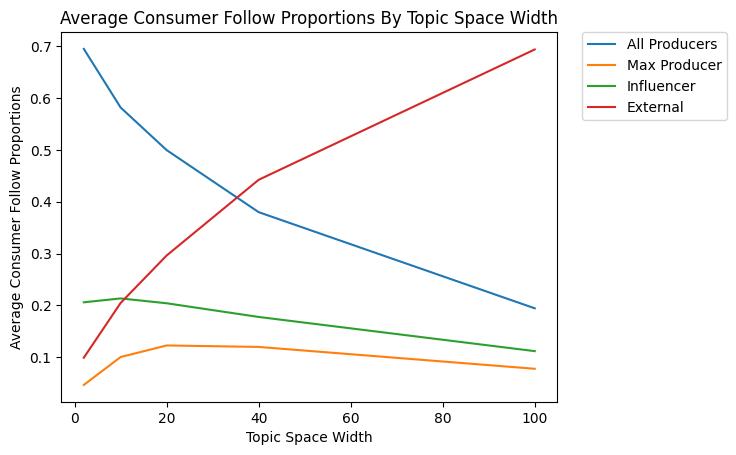

In [18]:
plt.figure()
plt.title(f'Average Consumer Follow Proportions By {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average Consumer Follow Proportions')
avg_producer_proportions = []
avg_max_producer_proportions = []
avg_influencer_proportions = []
avg_external_proportions = []
for i in range(len(varied_param_values)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_producer_proportion = 0
    avg_max_producer_proportion = 0
    avg_influencer_proportion = 0
    avg_external_proportion = 0
    for consumer in perfect_stat.consumer_stats.values():
        avg_producer_proportion += sum(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_max_producer_proportion += np.max(consumer.following_rates[-1][:-2]) / consumer.agent.attention_bound
        avg_influencer_proportion += consumer.following_rates[-1][-2] / consumer.agent.attention_bound
        avg_external_proportion += consumer.following_rates[-1][-1] / consumer.agent.attention_bound
    avg_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_max_producer_proportion /= len(perfect_stat.consumer_stats)
    avg_influencer_proportion /= len(perfect_stat.consumer_stats)
    avg_external_proportion /= len(perfect_stat.consumer_stats)

    avg_producer_proportions.append(avg_producer_proportion)
    avg_max_producer_proportions.append(avg_max_producer_proportion)
    avg_influencer_proportions.append(avg_influencer_proportion)
    avg_external_proportions.append(avg_external_proportion)
plt.plot(varied_param_values, avg_producer_proportions, label='All Producers')
plt.plot(varied_param_values, avg_max_producer_proportions, label='Max Producer')
plt.plot(varied_param_values, avg_influencer_proportions, label='Influencer')
plt.plot(varied_param_values, avg_external_proportions, label='External')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

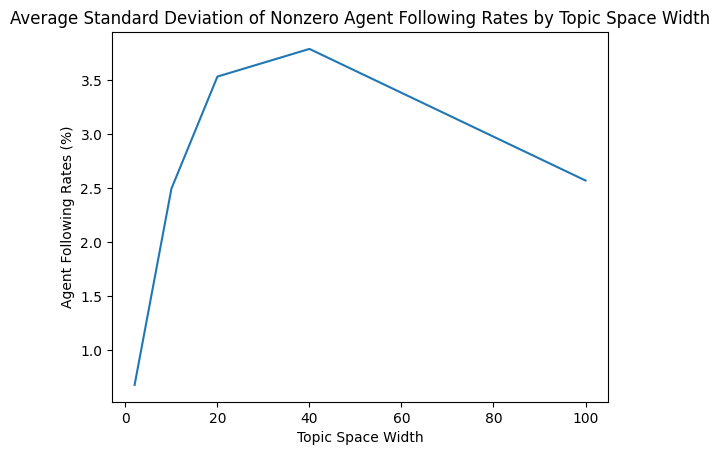

In [19]:
plt.figure()
plt.title(f'Average Standard Deviation of Nonzero Agent Following Rates by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Agent Following Rates (%)')
average_standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_standard_deviation = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x / stat.agent.attention_bound * 100 for x in stat.following_rates[-1][:-2] if x > 1e-3]
        if len(following_rate) == 0:
            continue
        avg_standard_deviation += np.std(following_rate)
    average_standard_deviations.append(avg_standard_deviation / len(perfect_stat.consumer_stats))
plt.plot(varied_param_values, average_standard_deviations)
plt.show()

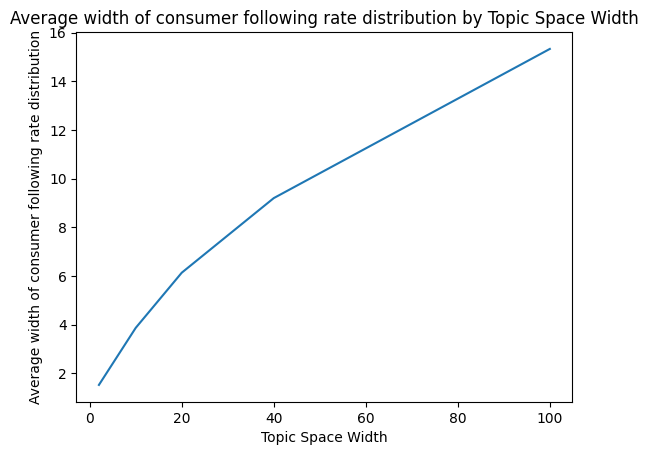

In [20]:
plt.figure()
plt.title(f'Average width of consumer following rate distribution by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Average width of consumer following rate distribution')
average_widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    avg_width = 0
    for index in perfect_stat.consumer_stats:
        stat = perfect_stat.consumer_stats[index]
        following_rate = [x for x in stat.following_rates[-1][:-2]]
        min_nonzero_index = 0
        max_nonzero_index = len(following_rate) - 1
        while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
            min_nonzero_index += 1
        while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
            max_nonzero_index -= 1
        if min_nonzero_index > max_nonzero_index:
            continue
        avg_width += np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    average_widths.append(avg_width / len(perfect_stat.consumer_stats))
plt.plot(varied_param_values, average_widths)
plt.show()

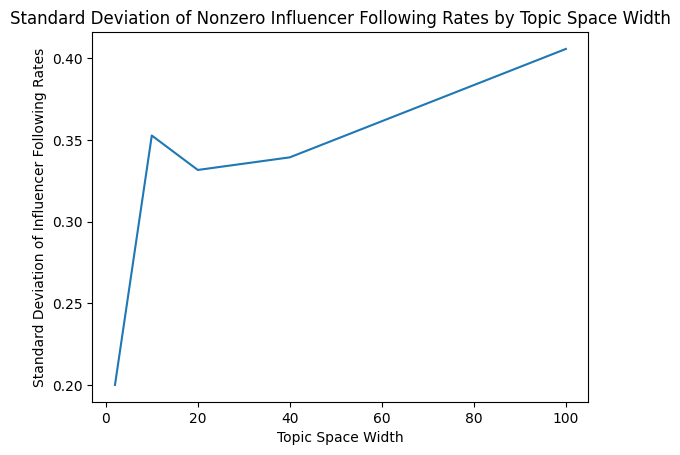

In [21]:
plt.figure()
plt.title(f'Standard Deviation of Nonzero Influencer Following Rates by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Standard Deviation of Influencer Following Rates')
standard_deviations = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    influencer_stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x / influencer_stat.agent.attention_bound * 100 for x in influencer_stat.following_rates[-1][:-2] if x > 1e-3]
    standard_deviations.append(np.std(following_rate))
plt.plot(varied_param_values, standard_deviations)
plt.show()

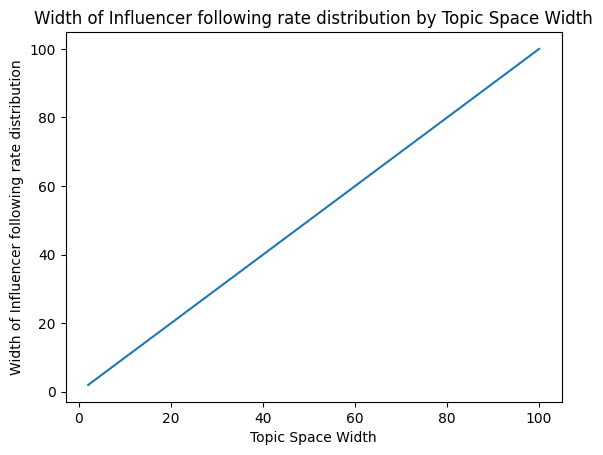

In [22]:
plt.figure()
plt.title(f'Width of Influencer following rate distribution by {varied_param_x_label}')
plt.xlabel(varied_param_x_label)
plt.ylabel('Width of Influencer following rate distribution')
widths = []
for i in range(len(perfect_info_stats)):
    perfect_stat: TestStats = perfect_info_stats[i]
    width = 0
    stat = [x for x in perfect_stat.influencer_stats.values()][0]
    following_rate = [x for x in stat.following_rates[-1][:-2]]
    min_nonzero_index = 0
    max_nonzero_index = len(following_rate) - 1
    while following_rate[min_nonzero_index] < 1e-3 and min_nonzero_index < len(following_rate) - 1:
        min_nonzero_index += 1
    while following_rate[max_nonzero_index] < 1e-3 and max_nonzero_index > 0:
        max_nonzero_index -= 1
    if min_nonzero_index > max_nonzero_index:
            continue
    width = np.linalg.norm(perfect_stat.producer_stats[max_nonzero_index].agent.main_interest - perfect_stat.producer_stats[min_nonzero_index].agent.main_interest)
    widths.append(width)
plt.plot(varied_param_values, widths)
plt.show()

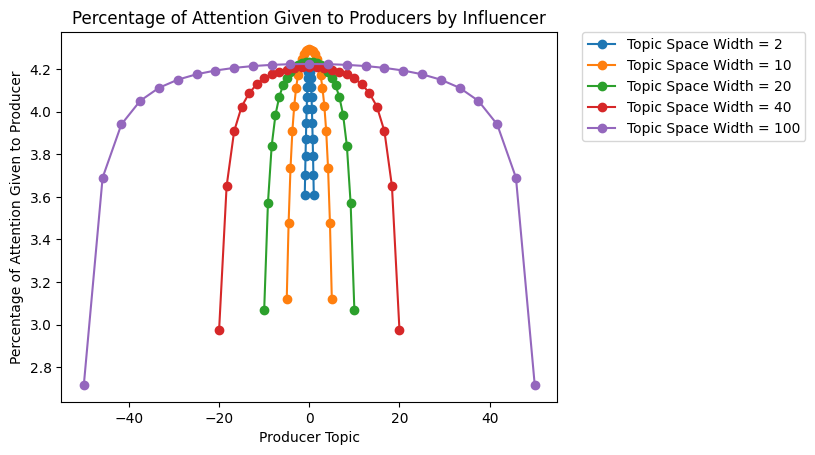

In [29]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index] / influencer.attention_bound * 100) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Percentage of Attention Given to Producers by Influencer")
plt.xlabel("Producer Topic")
plt.ylabel("Percentage of Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

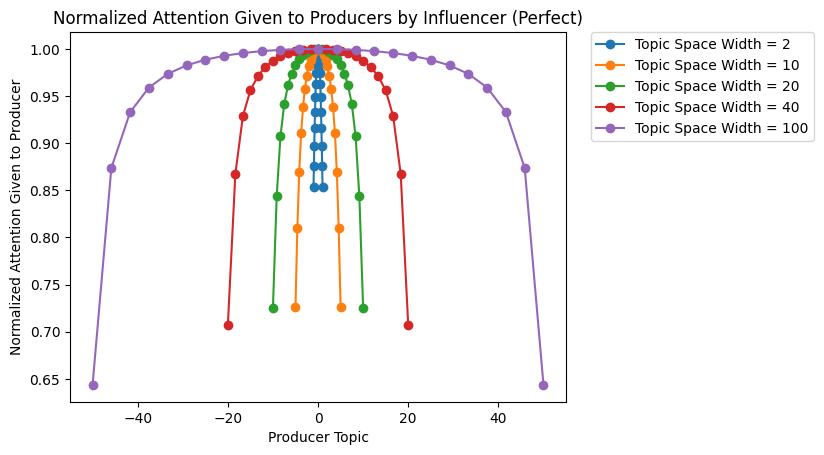

In [30]:
for val, stat in zip(varied_param_values, perfect_info_stats):
    influencer_ind = num_agents
    influencer_stat = stat.influencer_stats[influencer_ind]
    influencer = influencer_stat.agent
    following_rates = influencer_stat.following_rates[-1]
    min_rate = min(following_rates)
    max_rate = max(following_rates)
    following_rates = [(rate - min_rate) / (max_rate - min_rate) for rate in following_rates]
    prod_main_interest_with_rates = [(prod.main_interest[0], following_rates[prod.index]) for prod in influencer.market.producers]
    prod_main_interest_with_rates.sort(key=lambda x: x[0])
    plt.plot([x[0] for x in prod_main_interest_with_rates], [x[1] for x in prod_main_interest_with_rates], label=f'{varied_param_legend_label} = {val}', marker='o')

plt.title(f"Normalized Attention Given to Producers by Influencer (Perfect)")
plt.xlabel("Producer Topic")
plt.ylabel("Normalized Attention Given to Producer")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()